# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


example: https://github.com/username/exercise_name

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [84]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [85]:
# `load_boston` has been removed from scikit-learn since version 1.2. 
# I took the data from https://www.kaggle.com/datasets/vikrishnan/boston-house-prices?resource=download

data = np.loadtxt('housing.csv') 
X, y = data[:,:-1] , data[:,-1] 

In [86]:
# what is p and n?
print(f'''
The number of features - p is {X.shape[1]}
The number of observations n is {X.shape[0]}
''')



The number of features - p is 13
The number of observations n is 506



In [87]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None
    
  @staticmethod
  def pad(X):
    """pad the input data of features matrix with a colum of ones in the first column

    :param X: np.array
    :return: np.array
    """
    return np.insert(X, 0, 1, axis=1)
  
  def fit(self, X, Y):
    self._fit(X, Y)
    return self

  def _fit(self, X, Y):
    # optional to use this
    X = self.pad(X)
    self.w = np.linalg.pinv(X)@Y
  
  def predict(self, X):
    #return wx
    # X = self.pad(X)
    # return (X@self.w).flatten()
    return self._predict(X) 
  
  def _predict(self, X):
    # optional to use this
    X = self.pad(X)
    return (X@self.w).flatten()
  
    
  def score(self, X, Y):
    #return MSE
    return np.mean((Y - self.predict(X))**2)

In [88]:
# Fit the model. What is the training MSE?

ols = Ols()
ols.fit(X,y)
print(f'''
The MSE of house_prices over all boston features, using all the data set, is {ols.score(X,y) :.3f}
''')



The MSE of house_prices over all boston features, using all the data set, is 21.895



In [89]:
y_hat = ols.predict(X)
y_hat = y_hat.reshape(-1,1)
y_ols = Ols()
y_ols.fit(y_hat,y)
y_hat_mean = y_ols.predict(y_hat) 

y_hat_mean = np.sort(y_hat_mean)
y_sorted = np.sort(y)

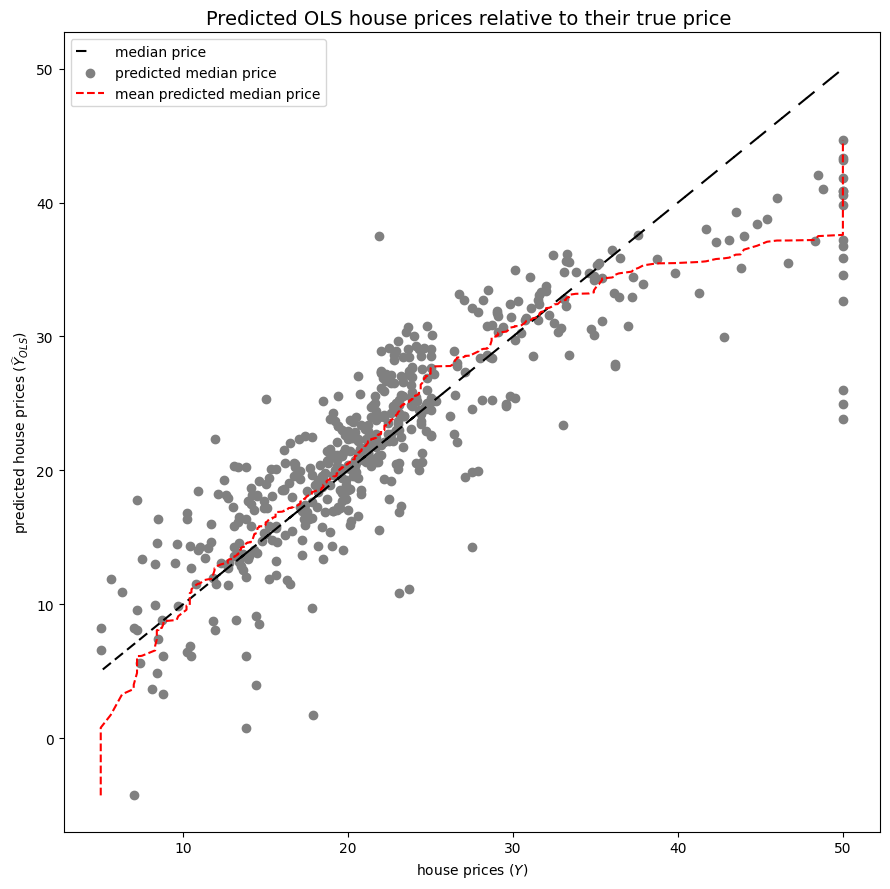

In [90]:
# Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$


with plt.style.context('seaborn-colorblind'):
    plt.figure(figsize=(9,9))
    plt.plot(y, y, c='black', linestyle=(0, (5, 10)), label='median price')
    plt.scatter(y, y_hat, c='gray', label='predicted median price')
    plt.plot(y_sorted, y_hat_mean, c='red', linestyle='--', label='mean predicted median price')
    plt.xlabel('house prices ($Y$)')
    plt.ylabel('predicted house prices ($\widehat{Y}_{OLS}$)')
    plt.legend()
    plt.title('Predicted OLS house prices relative to their true price ', size=14)
    plt.tight_layout()
    plt.show()


We can clearly see that the OLS model have relatively high performance over $Y<35$ but in higher prices the predicted price $\hat{Y}_{OLS}$ is negatively biased. 
This could be caused by data censorship in the features, a common problem in some survey data, due to privacy protection.     

In [91]:
from sklearn.model_selection import train_test_split
# Split the data to 75% train and 25% test 20 times. 
mse_per_model = np.zeros((20,2))

for r in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=r)
    ols = Ols()
    ols.fit(X_train,y_train)
    mse_per_model[r,0] = ols.score(X_train,y_train)
    mse_per_model[r,1] = ols.score(X_test,y_test)

mean_mse_per_model = np.mean(mse_per_model, axis=0)
# What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).
print(f'''
The average MSE for train is {mean_mse_per_model[0] :.3f} and for the test is {mean_mse_per_model[1] :.3f}
''')



The average MSE for train is 21.234 and for the test is 25.145



In [92]:

# Use a t-test to proove that the MSE for training is significantly smaller than for testing. 
# What is the p-value? 
# Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

from scipy.stats import ttest_rel

mse_train = mse_per_model[:,0]
mse_test = mse_per_model[:,1]

_ , pv = ttest_rel(mse_test, mse_train , alternative='greater') 

if pv < 0.05:
    print(f'Training MSE is significantly smaller than the testing MSE. The test\'s p-values is {pv :.4f}')
else:
    print(f'Training MSE is not significantly smaller than the testing MSE, we don\'t reject null at 0.95 significance . The test\'s p-values is {pv :.4f}')

Training MSE is significantly smaller than the testing MSE. The test's p-values is 0.0035


In [93]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    self.mu = None
    self.s = None

  def fit(self, X):
    self.mu = np.mean(X, axis=0)
    self.s = np.std(X, axis=0)
    return self

  def predict(self, X):
    return (X-self.mu)/self.s
    
class OlsGd(Ols):
  
  def __init__(self, learning_rate=.05, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               verbose=True):
    
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()    
    self.verbose = verbose
    self.delta =10**-12
    self.loss_ = []

  
  def _fit(self, X, Y, reset=True):   # track_loss=True - not using this 
    
    if self.normalize:
      X = self.normalizer.fit(X).predict(X)
    
    X = self.pad(X) #should it be self? it's not of any class instance
    
    self.n, self.m = X.shape
    
    if reset:
      # self.w = np.random.standard_normal(self.m, ) # weights initialization
      self.w = np.ones(self.m)

    for i in range(self.num_iteration):
      
      self._step(X, Y)

      if  self.verbose and ((i+1) % 10 == 0):
        print(f'''
              Iteration {i+1} out of {self.num_iteration} ({(i+1)/self.num_iteration * 100 :.2f} % completed)
              Loss = {self.loss_[i]}
              Coefficients: {self.w}
               '''
              )
      
      if self.early_stop and (i>20):
        if self.loss_[-5]-self.loss_[-1] < self.delta:
          print(f'Early stopping after {i+1} iterations')
          break
    
    return self   
        

  def _predict(self, X):
    #remeber to normalize the data before starting
    if self.normalize:
      X = self.normalizer.fit(X).predict(X)
    X = self.pad(X)
    return (X@self.w).flatten()

  def loss(self, Y, Y_predicted):
      return (1/(2*self.n)) * np.sum(((Y_predicted-Y)**2))

  def _step(self, X, Y):
    # compute loss
    Y_h =X@self.w
    self.loss_.append(self.loss(Y,Y_h))
    # compute weights
    self.w = self.w - self.learning_rate * (2/self.n)*X.T@(Y_h-Y)
    

In [94]:
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
learning_rates = [0.001, 0.003, 0.005, 0.010]
loss_table = np.zeros((1000,len(learning_rates)))
labels = []
for col, lr in enumerate(learning_rates):
    olsgd = OlsGd(learning_rate=lr, early_stop=False, verbose=False)
    olsgd.fit(X,y)
    loss_table[:,col] = np.array(olsgd.loss_).T #reshape(-1,1)
    labels.append(f'{lr} - learning rate')

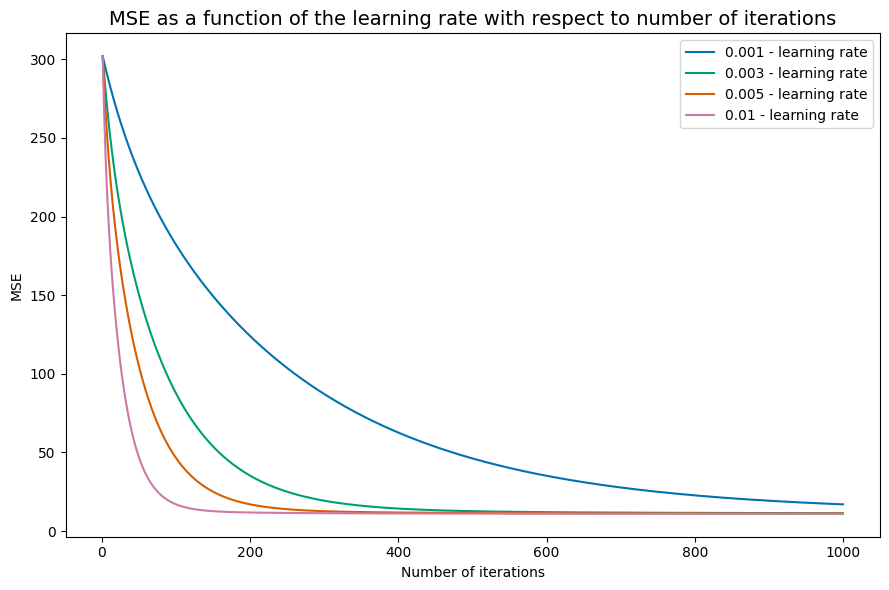

In [95]:
with plt.style.context('seaborn-colorblind'):
    plt.figure(figsize=(9,6))
    plt.plot(np.arange(1,1001), loss_table, label=labels)
    plt.xlabel('Number of iterations')
    plt.ylabel('MSE')
    plt.title('MSE as a function of the learning rate with respect to number of iterations', size=14)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [96]:
ols.fit(X,y)
ols.score(X,y)

21.894831181729202

In [97]:
np.min(loss_table, axis=0)

array([17.00317512, 11.37742699, 11.10689672, 10.97646565])

**What is the effect of learning rate?**<br>
The learning rate increases the gradient 'step' in each iteration which leads to a faster decrease in MSE value (until convergence). 
If the learning rate is too high it could lead to divergence and MSE explosion
  
**How would you find number of iteration automatically?**<br> 
given a learning rate and delta, whe can use the early_stop to stop the iterations


## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



Let $L\left(\cdot\right)$ be: 
$$L\left(y,\hat{y}\right)=\sum_{i=1}^{N}\left(y^{\left(i\right)}-\hat{y}^{\left(i\right)}\right)^{2}+\lambda\left\Vert w\right\Vert _{2}^{2}$$ 
we need to show that $$w_{Ridge}=\left(X^{T}X+\lambda I\right)^{-1}X^{T}y$$ 

**Answer:**

$$
\begin{aligned}
L\left(y,\hat{y}\right)	&=\sum_{i=1}^{N}\left(y^{\left(i\right)}-\hat{y}^{\left(i\right)}\right)^{2}+\lambda\left\Vert w\right\Vert _{2}^{2} \\
	&=\left(y-\hat{y}\right)^{T}\left(y-\hat{y}\right)+\lambda w^{T}w \\
	&=\left(y-X^{T}w\right)^{T}\left(y-X^{T}w\right)+\lambda w^{T}w \\
	&=y^{T}y-2w^{T}X^{T}y+w^{T}X^{T}Xw+\lambda w^{T}w \\
\end{aligned}
$$

taking the derivative by $w$

$$
\begin{aligned}

& \frac{\partial L}{\partial w} = 0-2X^{T}y+2X^{T}Xw+2\lambda w\underset{FOC}{=}0 \\
& \iff	\left(X^{T}X+\lambda I\right)w =X^{T}y \\
& \iff	w_{Ridge} =\left(X^{T}X+\lambda I\right)^{-1}X^{T}y \\

\end{aligned}
$$

In [99]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
  def _fit(self, X, Y):
    #Closed form of ridge regression
    X = self.pad(X)
    I = np.identity(len(X))
    self.w = np.linalg.pinv(X.T@X+Iself.ridge_lambda)@X.T@Y

class RidgeGd(OlsGd):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda

    
  def loss(self, Y, Y_predicted):
      # return (1/(2*self.n)) * np.sum(((Y_predicted-Y)**2))
      return np.sum(((Y_h-Y)**2)) + self.ridge_lambda * np.dot(self.w,self.w)
      
  def _step(self, X, Y):
    # compute loss
    Y_h =X@self.w
    loss = np.sum(((Y_h-Y)**2)) + self.ridge_lambda * np.dot(self.w,self.w)

    self.loss_.append(loss)
    # compute weights
    self.w = self.w - self.learning_rate * ((2/self.n)*X.T@(Y_h-Y) + self.ridge_lambda * self.w)

    

Let $G\sim N\left(1,\sigma^{2}\right)$ and $X^{\prime}=X\cdot G$ s.t $EX^{\prime}=E\left[X\cdot G\right]=EX$ 

First notice the followig property about $G$ 

$$Var\left(G\right) =\sigma^{2}=EG^{2}-E^{2}G \underset{EG=1}{=}EG^{2}-1 \iff EG^{2}=\sigma^{2}+1 $$

Now looking back on the loss of OLS we can write:
$$

\begin{aligned}

L &=\left\Vert y-w^{T}X^{\prime}\right\Vert ^{2} \\
 &=\left(y-Gw^{T}X\right)^{T}\left(y-Gw^{T}X\right) \\
 &=\left[y^{T}y-2Gw^{T}X^{T}y+G^{2}w^{T}X^{T}Xw\right] \\
&=\left[y^{T}y-G2w^{T}X^{T}y+G^{2}w^{T}X^{T}Xw\right] \\
&\\
EL &= E\left[y^{T}y-G2w^{T}X^{T}y+G^{2}w^{T}X^{T}Xw\right] \\
&=E\left[y^{T}y\right]-2EGEw^{T}X^{T}y+EG^{2}E\left[w^{T}X^{T}Xw\right] \\
&=E\left[y^{T}y\right]-2Ew^{T}X^{T}y+\left(1+\sigma^{2}\right)E\left[w^{T}X^{T}Xw\right] \\
&=EL_{OLS}+\sigma^{2}E\left[w^{T}X^{T}Xw\right] \\
&=EL_{OLS}+\sigma^{2}w^{T}E\left[X^{T}X\right]w \\
&=EL_{OLS}+\sigma^{2}\cdot\sigma_{X}^{2}w^{T}w \\
&\underset{*}{=}MSE+\sigma^{2}w^{T}w \\

\end{aligned}
$$

\* Note: if $X$ is normalized and $\forall l,m\in \left[1,p\right]\; s.t \; l\neq m\; Cov\left(x_{l},x_{m}\right) =0$ we get $E\left[X^{T}X\right]=\sigma_{X}^{2}=I_{p}$

From the above we can see that if $X$ is normalized, i.e $X\sim N\left(0,I_{p}\right)$, we get that the Ridge loss function with $\lambda = \sigma^{2}$  

**What is the interpretation?**<br> 
An intuitive interpretation is that when there is multiplicative independent noise (measurement error) in the data, on average OLS and Ridge converge. 
**NEED TO EXPAND ON THIS**
Ridge constraint it is as adding a noise which leads to a  

### Use scikitlearn implementation for OLS, Ridge and Lasso

In [134]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse , r2_score
ls = LinearRegression().fit(X,y)
ridge = Ridge(10).fit(X,y)
lasso = Lasso(10).fit(X,y)

y_ls = ls.predict(X)
y_ridge = ridge.predict(X)
y_lasso = lasso.predict(X)

print(f"""
OLS MSE: {mse(y, y_ls) :.3f} R^2 : {r2_score(y, y_ls) :.3f}
Ridge MSE: {mse(y, y_ridge) :.3f} R^2 : {r2_score(y, y_ridge) :.3f}
Lasso MSE: {mse(y, y_lasso) :.3f} R^2 : {r2_score(y, y_lasso) :.3f}
""")


OLS MSE: 21.895 R^2 : 0.741
Ridge MSE: 22.660 R^2 : 0.732
Lasso MSE: 40.237 R^2 : 0.523



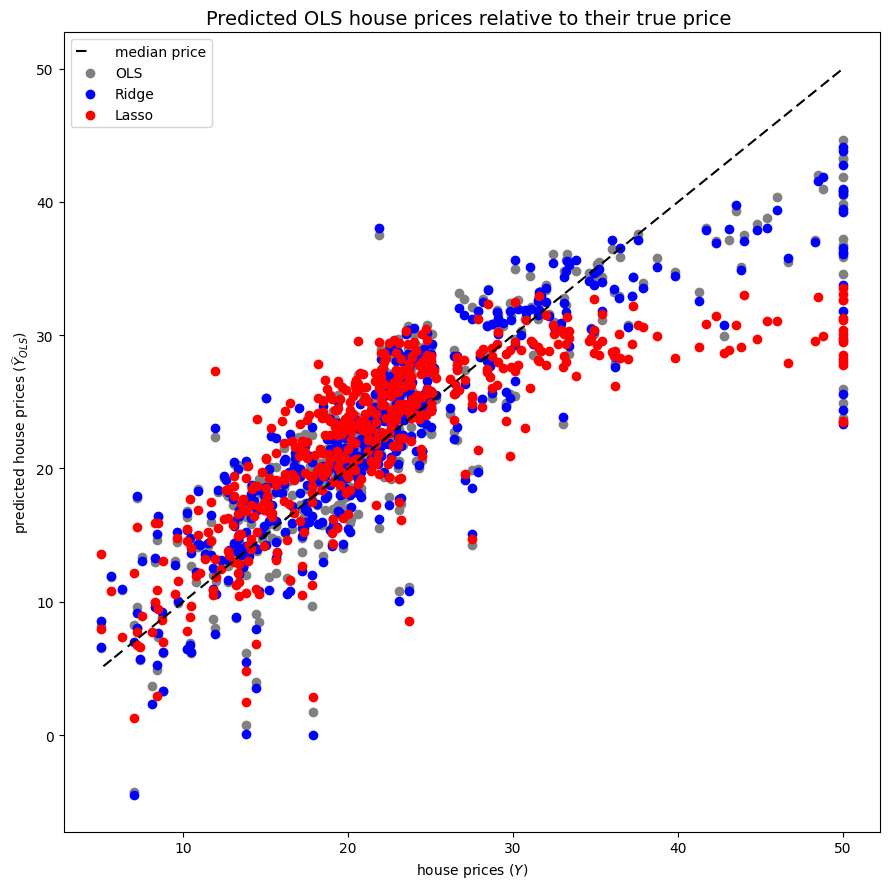

In [127]:
y_hat = ols.predict(X)
with plt.style.context('seaborn-colorblind'):
    plt.figure(figsize=(9,9))
    plt.plot(y, y, c='black', linestyle=(0, (5, 10)), label='median price')
    plt.scatter(y, y_ls, c='gray', label='OLS')
    plt.scatter(y, y_ridge, c='blue', label='Ridge')
    plt.scatter(y, y_lasso, c='red', label='Lasso')
    plt.xlabel('house prices ($Y$)')
    plt.ylabel('predicted house prices ($\widehat{Y}_{OLS}$)')
    plt.legend()
    plt.title('Predicted OLS house prices relative to their true price ', size=14)
    plt.tight_layout()
    plt.show()


As seen above, without tuning the models the OLS model has the best metric results. From plotting (again) the relation between the target ($Y$) and the predicted targets we see non of the new models improve the prediction in all $Y$ range, and the bad prediction in $Y > 35$ is still highly notable.